In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import jieba
from collections import Counter
import numpy as np
from PIL import Image
import string
punc = string.punctuation

讀取資料的部分

In [ ]:
test = pd.read_excel('D:/Downloads/Science/data.xlsx')

資料大概長這樣

In [ ]:
test[0:2]

每個星星的數量
可以看出給5跟4顆星星的評論是占多數的
可能是剛好抓到的飯店(120個)都是蠻高分的

In [ ]:
stars.value_counts()

篩選出星星等級有5或4的資料
代表是比較好的評論

In [ ]:
good = (test['review_stars']==(' 5 顆星 ' or ' 4 顆星 '))

並且把他所有的評論寫成一個txt檔案

In [ ]:
a = ""
for i in test[good]['review_text']:
    if type(i) is str:
            a = a+i
            
text_file = open("D:/Downloads/Science/high.txt", "wt",encoding="utf-8")
n = text_file.write(a)
text_file.close()

運用較好的評論做出文字雲方便觀察


In [ ]:
text = open('D:/Downloads/Science/high.txt',"r",encoding = "utf-8").read() #先把好的評論的文字檔讀進來
jieba.set_dictionary("D:/Downloads/Science/dict.txt.big.txt") #這是jieba預設好的中文字字典
font = 'C:\\Windows\\Fonts\\mingliu.ttc' #因為文字雲本身沒有中文字體的關係，需要從自己的電腦匯入

with open('D:/Downloads/Science/stopword.txt','r',encoding='utf-8') as f: #設定停用字
    stops = f.read().split('\n')
terms = []
for t in jieba.cut(text, cut_all = True): #運用jieba去做分割
    if t not in stops: #如果不是在停用字裡面就加進去
        terms.append(t)
diction = Counter(terms) #然後運用Counter去做個評詞序表的動作(Counter需要去匯入)

#plt.rcParams['savefig.dpi'] = 500 #图片像素
#plt.rcParams['figure.dpi'] = 500 #分辨率
#mask = np.array(Image.open('D:/Downloads/Science/food.png'))
wordcloud = WordCloud(font_path=font,
                      max_words=100,
                      relative_scaling = 0.3) #設定Worcloud的預設，max_words代表會取幾個字
wordcloud.generate_from_frequencies(diction)
plt.figure(figsize=(3,3),dpi = 1000) #dpi是畫質，但不管怎麼調畫質還是挺差的
plt.imshow(wordcloud)
plt.axis("off")

plt.show()
wordcloud.to_file('D:/Downloads/Science/high.png') #儲存圖片

評論好的評詞序表

In [ ]:
diction

In [ ]:
接下來做壞的部分

In [ ]:
bad = (test['review_stars']==(' 1 顆星 ' or ' 2 顆星 '))

一樣做成一個txt

In [ ]:
a = ""
for i in test[bad]['review_text']:
    if type(i) is str:
            a = a+i
            
text_file = open("D:/Downloads/Science/low.txt", "wt",encoding="utf-8")
n = text_file.write(a)
text_file.close()

In [ ]:
也做一個文字雲方便觀察

In [ ]:
text = open('D:/Downloads/Science/low.txt',"r",encoding = "utf-8").read()
jieba.set_dictionary("D:/Downloads/Science/dict.txt.big.txt")
font = 'C:\\Windows\\Fonts\\mingliu.ttc'

with open('D:/Downloads/Science/stopword.txt','r',encoding='utf-8') as f:
    stops = f.read().split('\n')
terms = []
for t in jieba.cut(text, cut_all = True):
    if t not in stops:
        terms.append(t)
diction2 = Counter(terms)

#plt.rcParams['savefig.dpi'] = 500 #图片像素
#plt.rcParams['figure.dpi'] = 500 #分辨率
#mask = np.array(Image.open('D:/Downloads/Science/food.png'))
wordcloud = WordCloud(font_path=font,max_words=100,relative_scaling = 0.3)
wordcloud.generate_from_frequencies(diction)
plt.figure(figsize=(3,3),dpi = 1000)
plt.imshow(wordcloud)
plt.axis("off")

plt.show()
wordcloud.to_file('D:/Downloads/Science/low.png')

In [ ]:
diction2.most_common()

前面是運用了jieba這個套件去斷詞
而因為斷詞導致一些字很難看清意思
像在負面的部分很多都跟正面的字是重複
但是'不'字很多
所以'好吃'
可能代表著'不好吃'
只是被斷掉了
所以接下來要試用看看N-gram的斷詞系統
看這個情況會不會讓正面與負面的評論有所差別

In [ ]:
from operator import itemgetter
chfreqsorted=sorted(chfreqdict.items(), key=itemgetter(1), reverse=True)
print(chfreqsorted)

In [4]:
def list2freqdict(mylist): #把每個字分開
    mydict=dict()
    for ch in mylist:
        mydict[ch]=mydict.get(ch,0)+1
    return mydict

In [5]:
def list2bigram(mylist): #兩個字的n-gram
    return [mylist[i]+mylist[i+1] for i in range(0,len(mylist)-1)]

def list2trigram(mylist): #三個字的n-gram
    return [mylist[i] + mylist[i+1] + mylist[i+2] for i in range(0,len(mylist)-2)]

def list2fourgram(mylist):
    return [mylist[i] + mylist[i+1] + mylist[i+2] + mylist[i+3] for i in range(0,len(mylist)-3)]

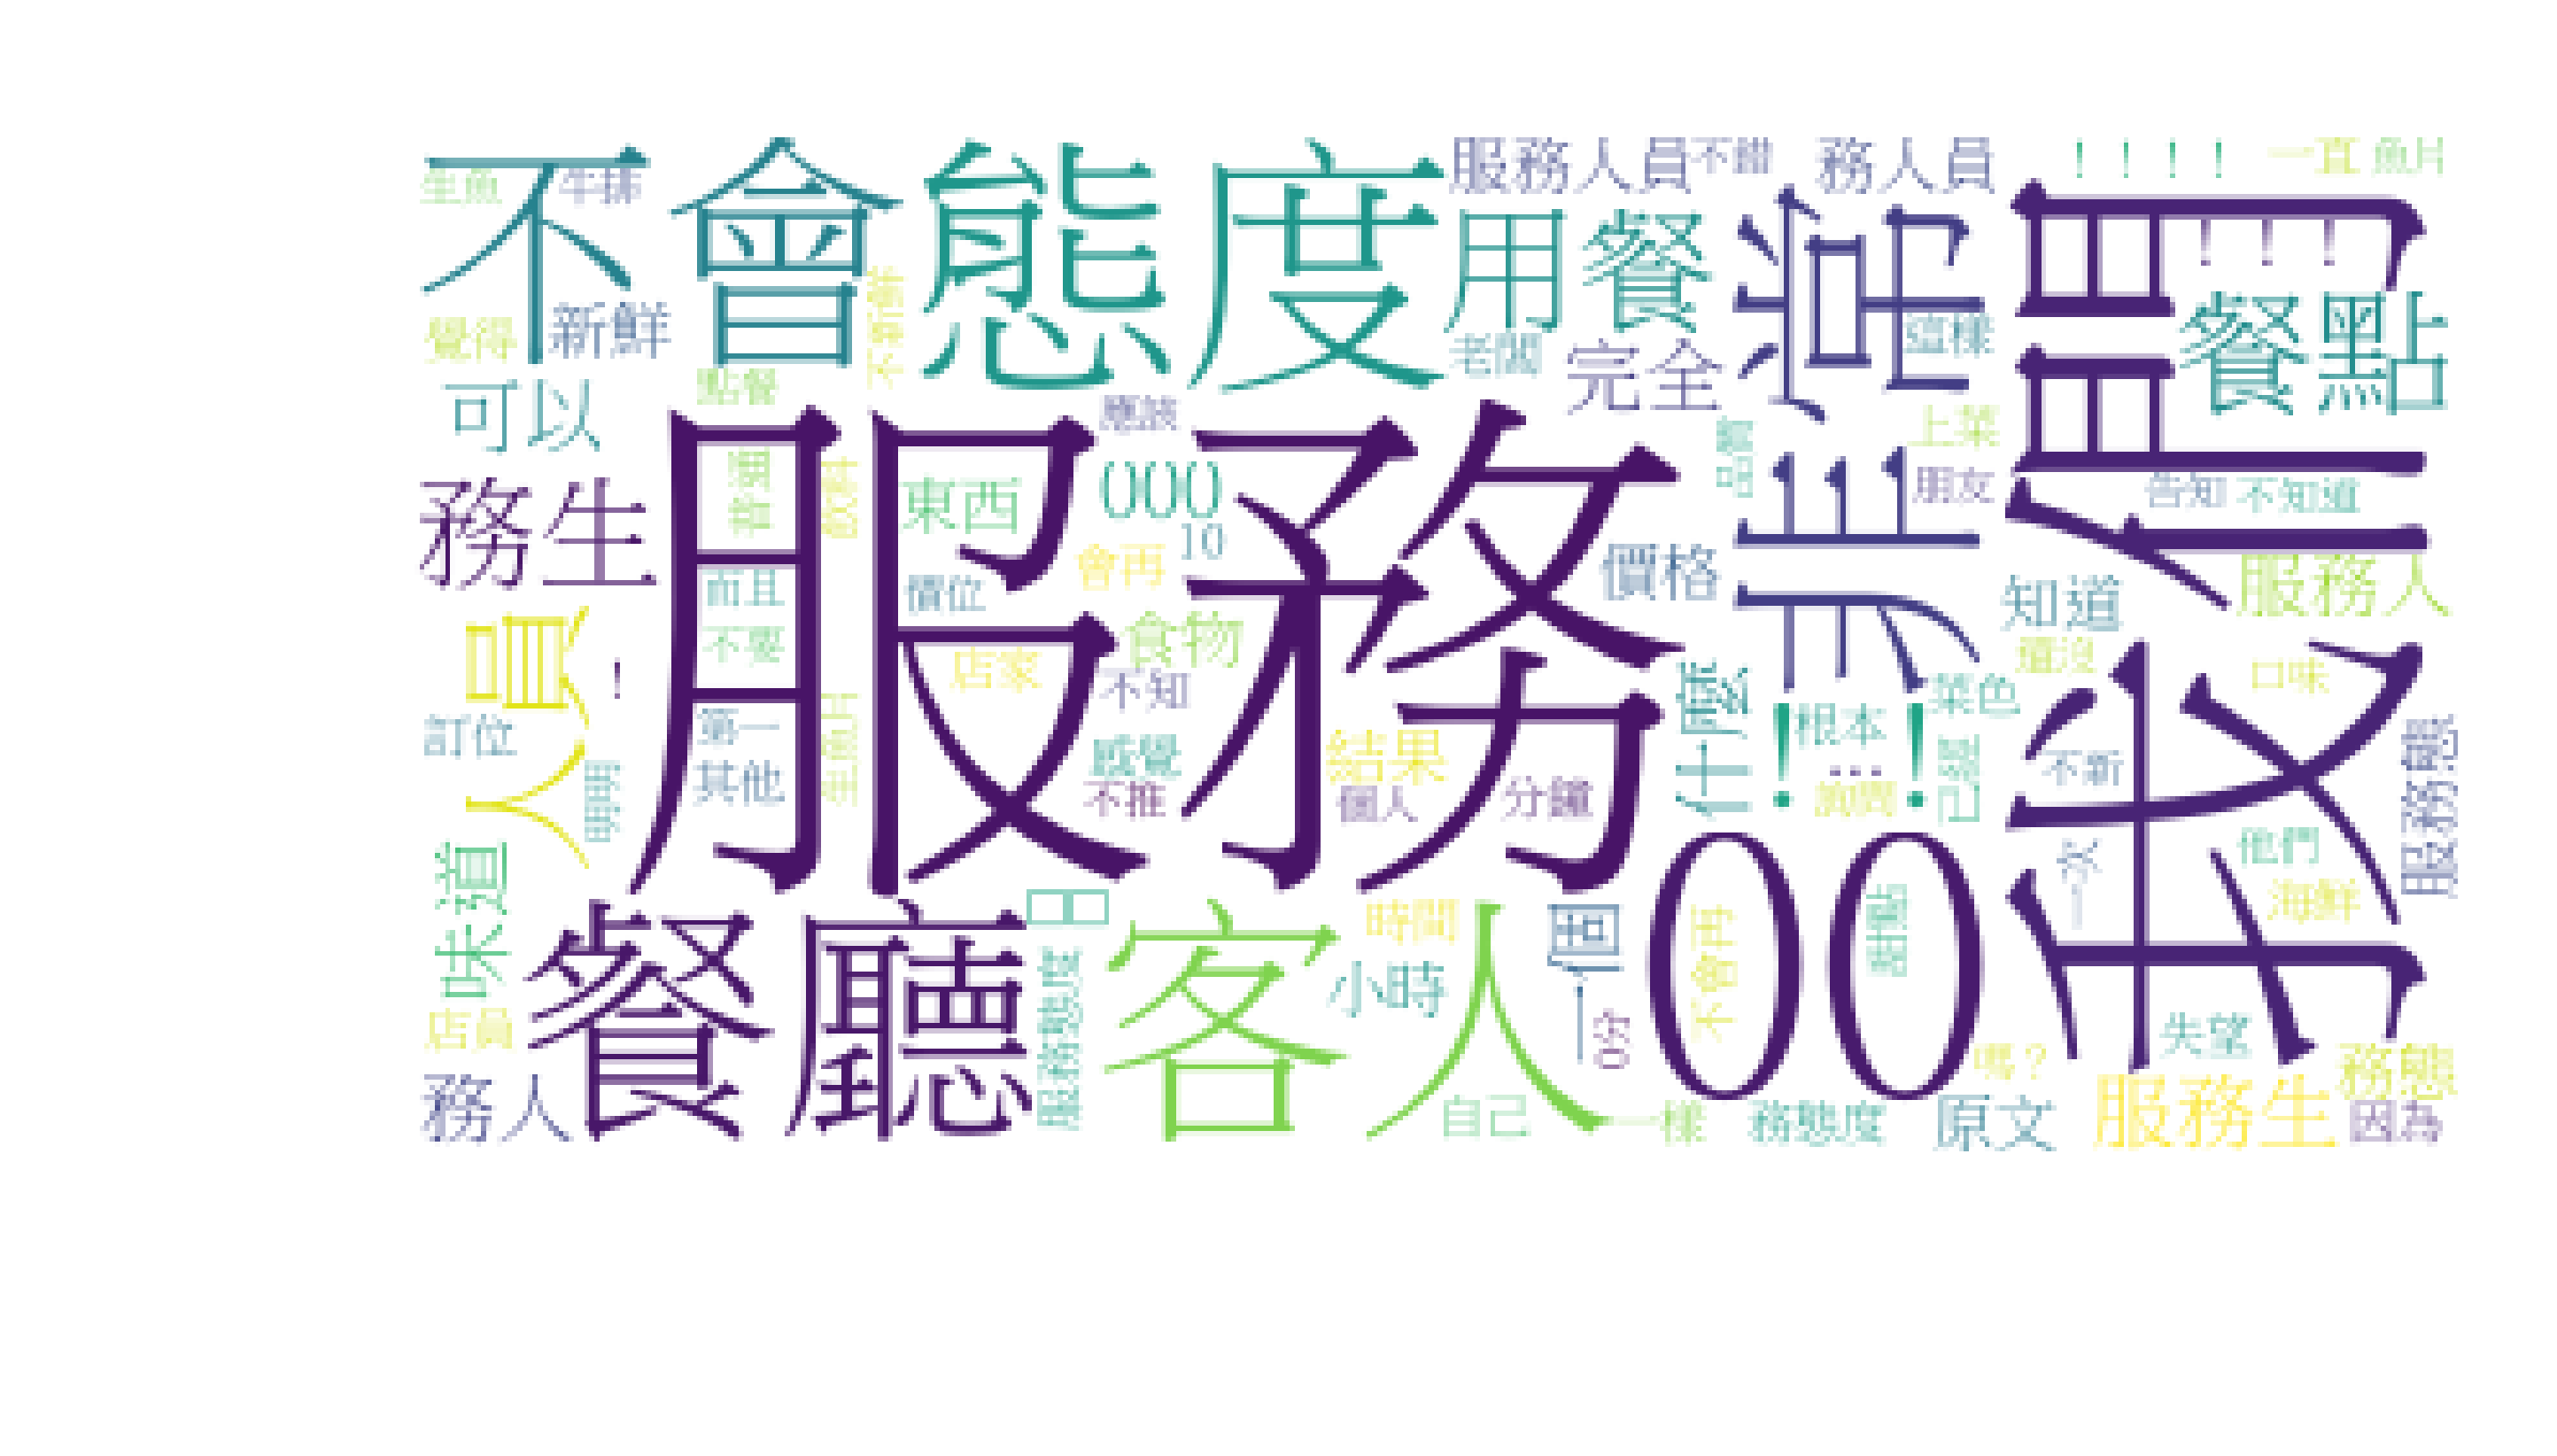

In [6]:
font = 'C:\\Windows\\Fonts\\mingliu.ttc'
sentence= open('D:/Downloads/Science/low.txt',"r",encoding = "utf-8").read() #要讀取的字串
chlist=[ch for ch in sentence] #把每個字分開

chfreqdict=list2freqdict(chlist) #一個字的
chbigram=list2bigram(chlist) #兩個字的
chtrigram=list2trigram(chlist) #三個字的
chfourgram= list2fourgram(chlist)

allngram = chbigram + chtrigram + chfourgram
with open('D:/Downloads/Science/stopword.txt','r',encoding='utf-8') as f:
    stops = f.read().split()
allngram2 = []
for i in allngram:
    for a in i:
        if a in stops:
            break
        elif a == i[-1]:
            allngram2.append(i)
diction2 = Counter(allngram2)

wordcloud = WordCloud(font_path=font,
                      max_words=100,
                      relative_scaling = 0.3,
                     background_color='white') #設定Worcloud的預設，max_words代表會取幾個字
wordcloud.generate_from_frequencies(diction2)
plt.figure(figsize=(3,3),dpi = 1000) #dpi是畫質，但不管怎麼調畫質還是挺差的
plt.imshow(wordcloud)
plt.axis("off")

plt.show()
#wordcloud.to_file('D:/Downloads/Science/high.png') #儲存圖片

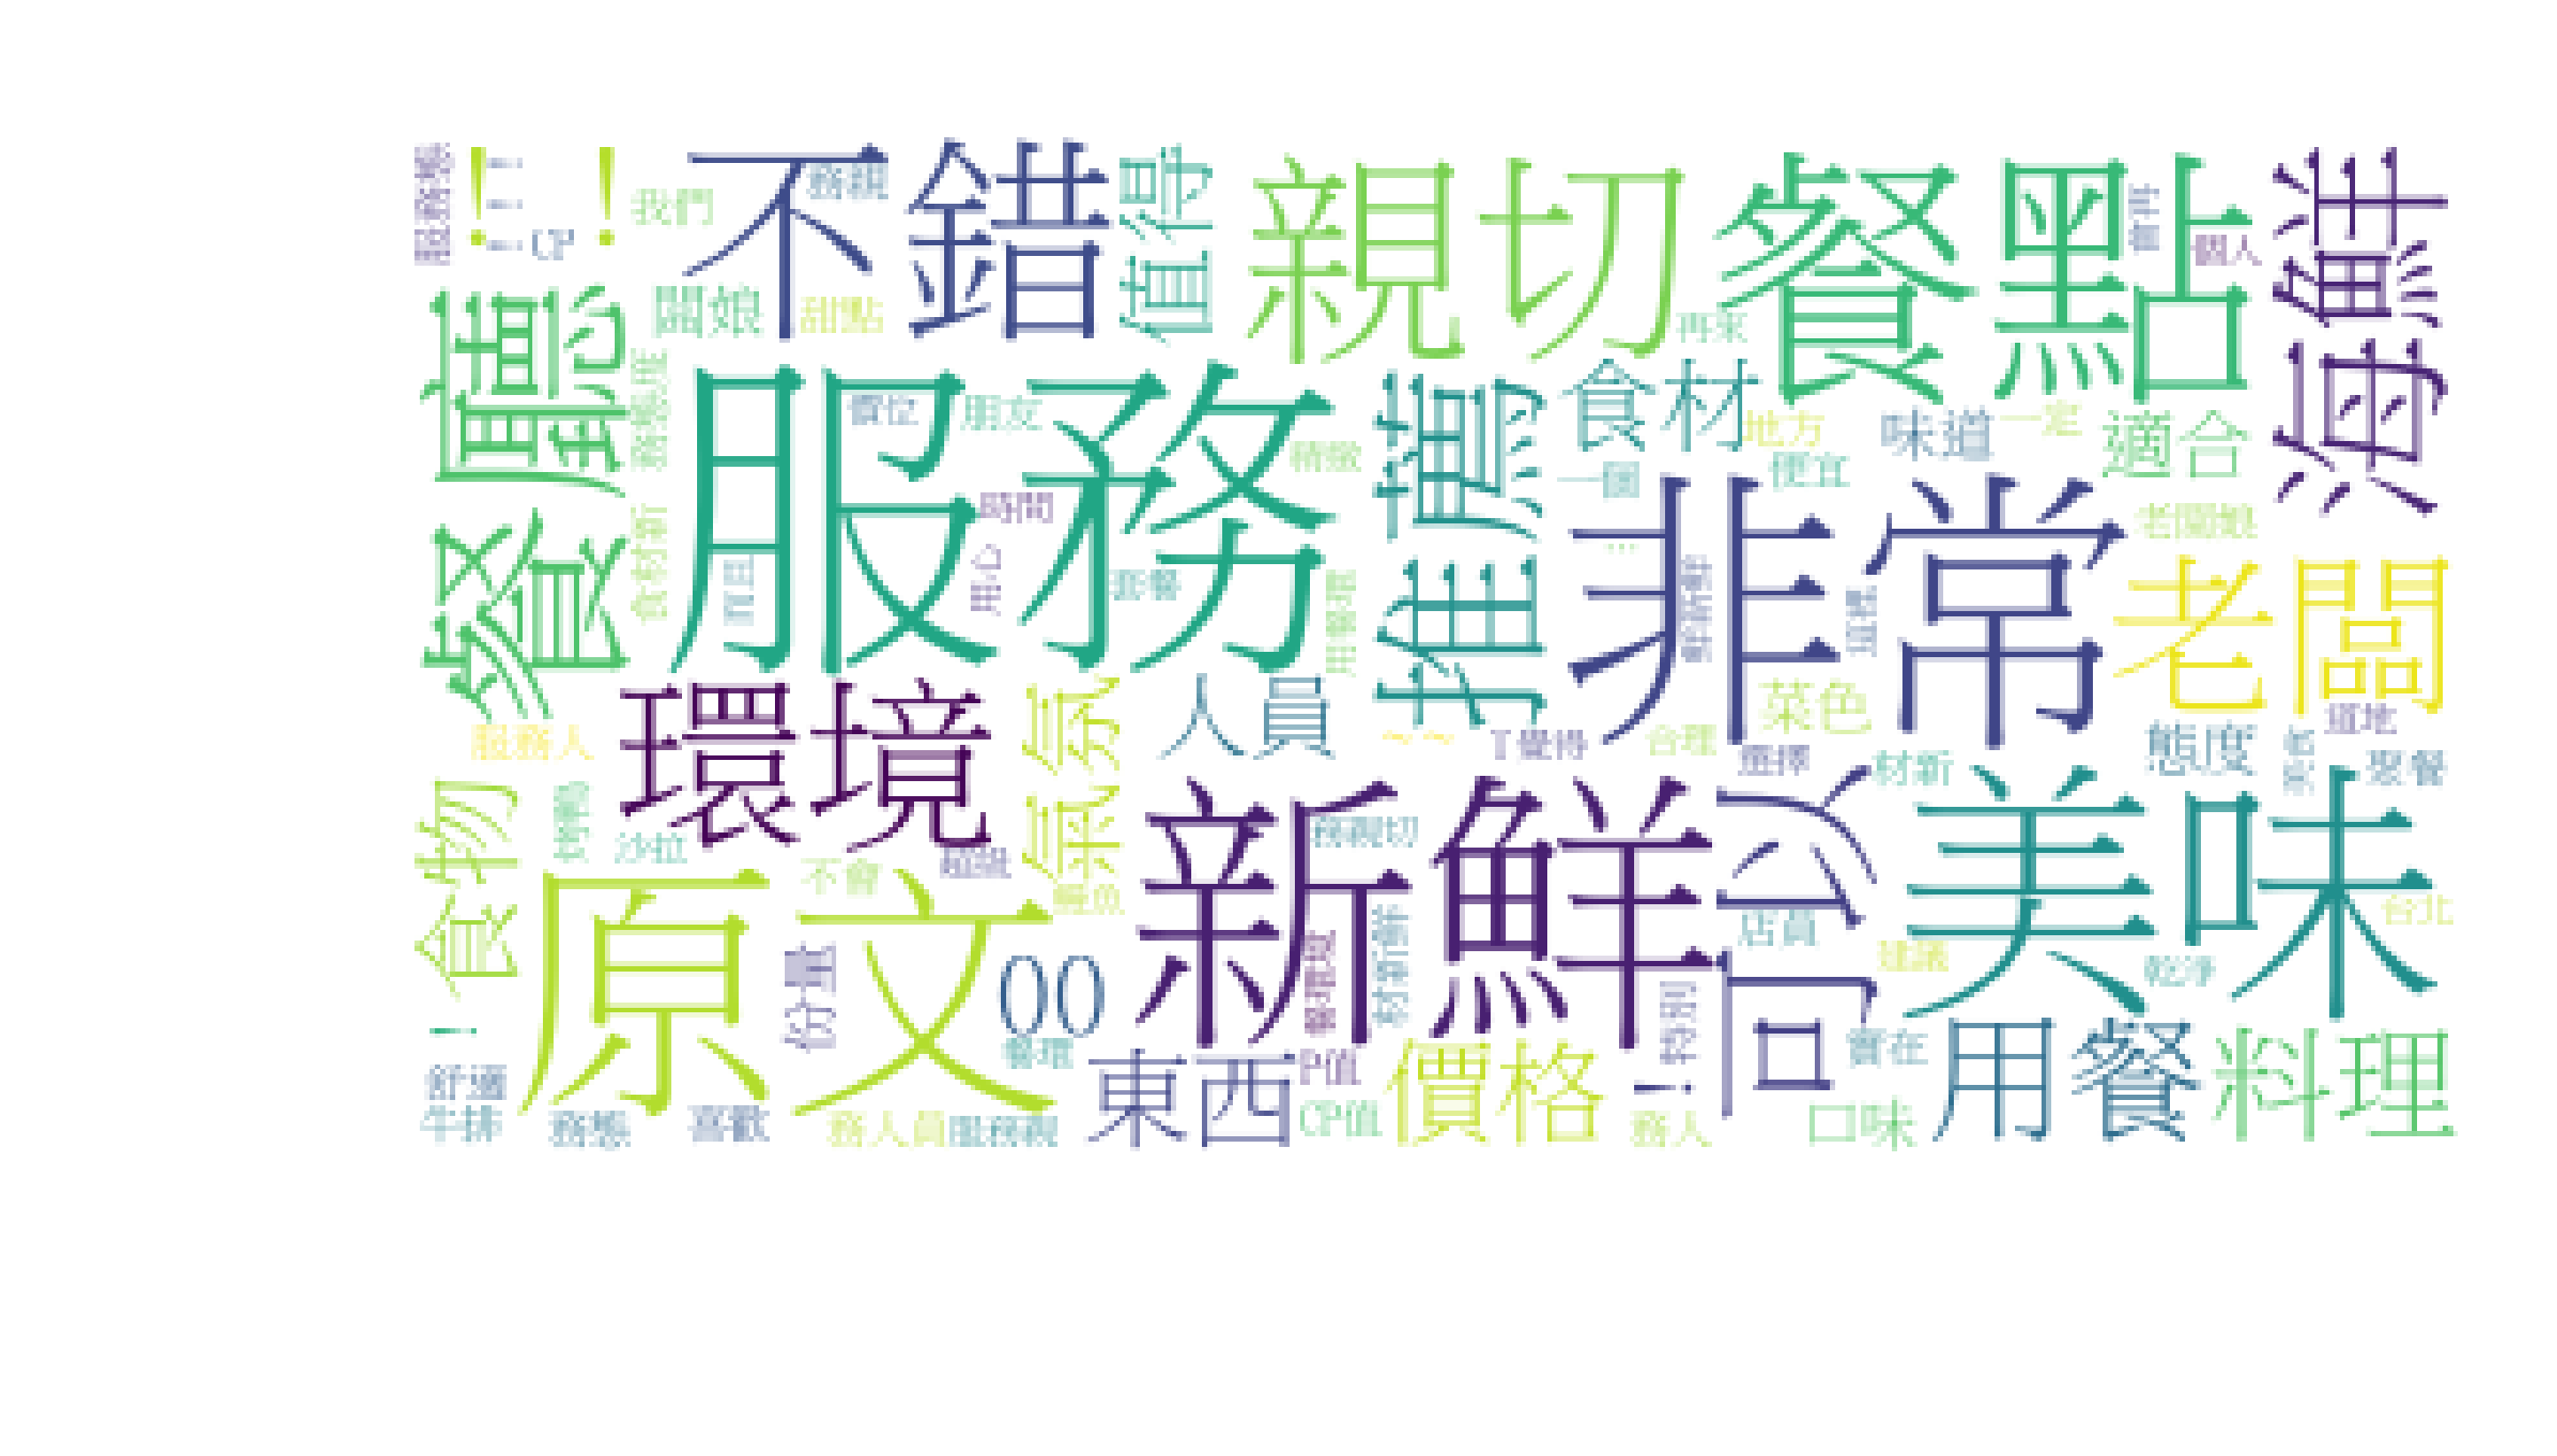

In [112]:
font = 'C:\\Windows\\Fonts\\mingliu.ttc' #jupyter無法正常顯示中文字，要引入電腦里內建的
sentence= open('D:/Downloads/Science/high.txt',"r",encoding = "utf-8").read()
chlist=[ch for ch in sentence] #把每個字分開

chfreqdict=list2freqdict(chlist)
chbigram=list2bigram(chlist)
chtrigram=list2trigram(chlist)

allngram = chbigram + chtrigram
with open('D:/Downloads/Science/stopword.txt','r',encoding='utf-8') as f:
    stops = f.read().split('\n')
allngram2 = []
for i in allngram:
    for a in i:
        if a in stops:
            break
        elif a == i[-1]:
            allngram2.append(i)
diction2 = Counter(allngram2)

wordcloud = WordCloud(font_path=font,
                      max_words=100,
                      relative_scaling = 0.3,
                     background_color='white') #設定Worcloud的預設，max_words代表會取幾個字
wordcloud.generate_from_frequencies(diction2)
plt.figure(figsize=(3,3),dpi = 1000) #dpi是畫質，但不管怎麼調畫質還是挺差的
plt.imshow(wordcloud)
plt.axis("off")

plt.show()

In [9]:
chfreqdict

{'餐': 1483,
 '食': 368,
 '應': 222,
 '該': 129,
 '是': 1993,
 '5': 209,
 '顆': 113,
 '星': 205,
 '！': 806,
 '包': 136,
 '箱': 6,
 '的': 3591,
 '服': 1036,
 '務': 1000,
 '人': 1394,
 '員': 543,
 '雖': 57,
 '然': 321,
 '不': 3046,
 '非': 341,
 '常': 392,
 '專': 33,
 '業': 75,
 '，': 6297,
 '但': 482,
 '確': 71,
 '和': 184,
 '善': 42,
 '被': 171,
 '扣': 9,
 '4': 159,
 '原': 240,
 '因': 190,
 '為': 311,
 '8': 147,
 '/': 77,
 '3': 193,
 '晚': 93,
 '上': 775,
 '櫃': 54,
 '枱': 3,
 '真': 403,
 '糟': 110,
 '透': 38,
 '了': 1570,
 '一': 1924,
 '開': 248,
 '始': 75,
 '進': 142,
 '去': 582,
 '尚': 28,
 '未': 65,
 '營': 28,
 '所': 172,
 '以': 533,
 '我': 1307,
 '們': 728,
 '坐': 63,
 '在': 701,
 '侯': 1,
 '位': 531,
 '區': 74,
 '只': 415,
 '聽': 51,
 '到': 958,
 '主': 144,
 '管': 67,
 '停': 23,
 '叫': 65,
 '罵': 11,
 '其': 246,
 '他': 326,
 '工': 142,
 '作': 68,
 '無': 203,
 '視': 22,
 '那': 209,
 '試': 39,
 '問': 379,
 '這': 751,
 '樣': 326,
 '你': 208,
 '會': 524,
 '期': 78,
 '待': 144,
 '她': 78,
 '提': 113,
 '供': 46,
 '什': 202,
 '麼': 420,
 '嗎': 140,
 '？': 339,
 '也': 857,


In [ ]:
chlist[0] +chlist[1]

參考資料:https://hambao.pixnet.net/blog/post/18823664
接下來可以做一個字兩個字三個字的值方圖
還有把重複的字去除掉
例如:服務態、務態度、服務